# Initializing

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from skimage.io import imread

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers.experimental import preprocessing

In [2]:
INPUT_DIR = os.path.join('.', 'input')
TRAIN_DIR = os.path.join(INPUT_DIR, 'train')
VALID_DIR = os.path.join(INPUT_DIR, 'valid')

assert os.path.exists(TRAIN_DIR)
assert os.path.exists(VALID_DIR)

display('Train directory: ' + TRAIN_DIR)
display('Validation directory: ' + VALID_DIR)

'Train directory: .\\input\\train'

'Validation directory: .\\input\\valid'

In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE


def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype = tf.float32)
    return image, label

In [4]:
ds = image_dataset_from_directory(
    TRAIN_DIR,
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128, 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = True,
)

ds_test = image_dataset_from_directory(
    'input/valid',
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128, 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = False,
)

class_names = ds.class_names
classes_count = len(class_names)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [5]:
batch_count=len(list(ds))
display(f'Batches count: {batch_count}')

'Batches count: 80'

In [6]:
for images, labels in ds.take(1):
    display(len(images))

64

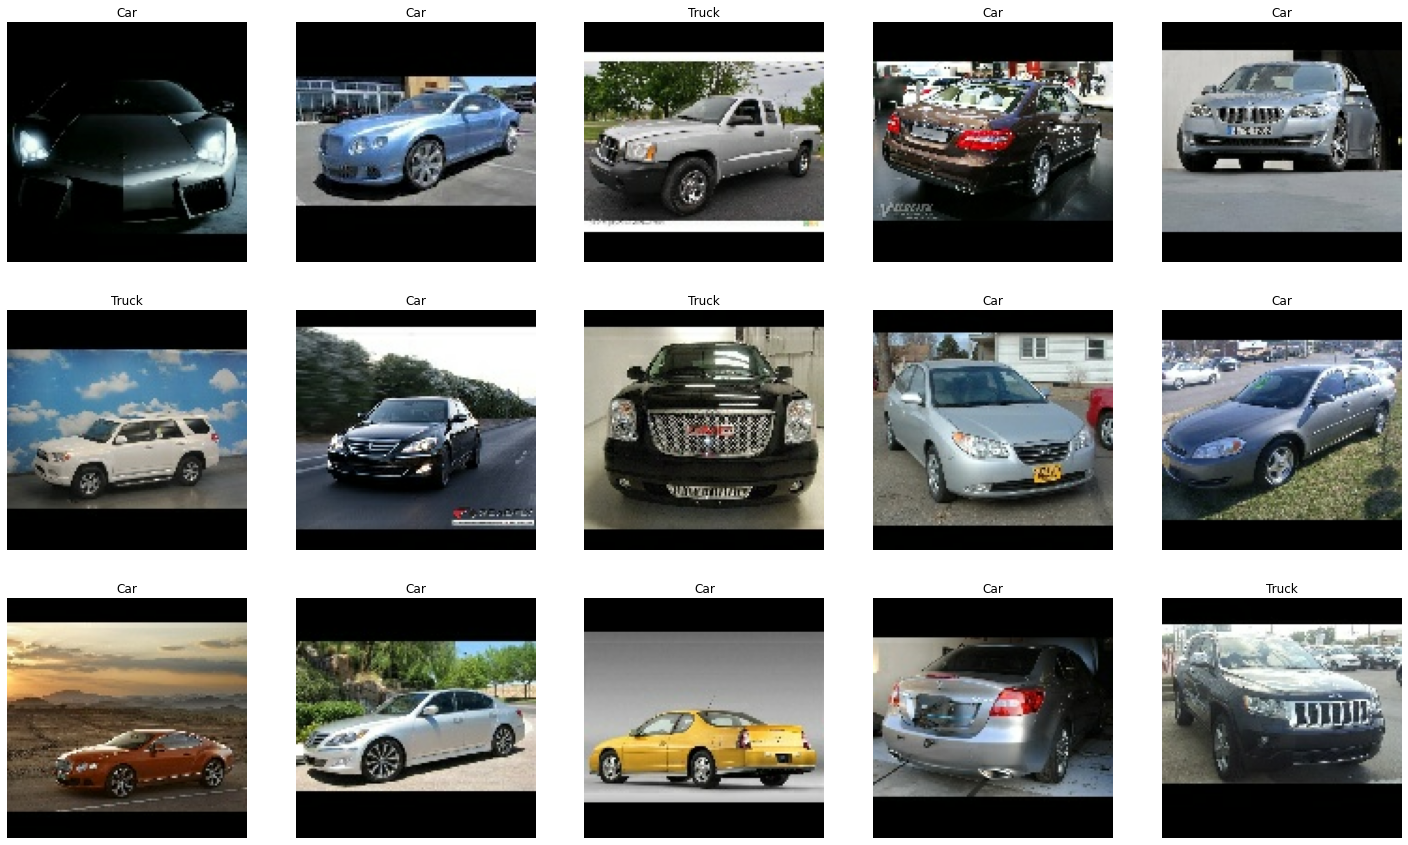

In [7]:
PREVIEW_ROW_COUNT = 3
PREVIEW_COLUMN_COUNT = 5

plt.figure(figsize = (PREVIEW_COLUMN_COUNT * 5, PREVIEW_ROW_COUNT * 5))
for images, labels in ds.take(1):
    for i in range(1, PREVIEW_ROW_COUNT * PREVIEW_COLUMN_COUNT + 1):
        ax = plt.subplot(PREVIEW_ROW_COUNT, PREVIEW_COLUMN_COUNT, i)
        plt.axis("off")
        #display(class_names[int(labels[i][0].numpy())])
        plt.imshow(images[i].numpy())
        plt.title(class_names[int(labels.numpy()[i][0])])

In [8]:
train_size = len(list(ds)) * 0.8
ds_train = ds.take(int(train_size))
ds_val = ds.skip(int(train_size))

ds_train = ds_train.cache().prefetch(buffer_size = AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size = AUTOTUNE)

In [9]:
class CustomGenerator(keras.utils.Sequence):

    def __data_generation(self, list_IDs_temp):
        display(list_IDs_temp)

        return X, null

In [10]:
model = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomContrast(0.5),
    preprocessing.RandomZoom(0.1),

    tf.keras.layers.Rescaling(1. / 255),
    layers.Conv2D(filters = 32, kernel_size = 5, activation = "relu", padding = 'same',
                  input_shape = [128, 128, 3]),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = 'same'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = 'same'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu", padding = 'same'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(units = 16, activation = "relu"),
    layers.Dense(units = 1, activation = "sigmoid"),
])

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)



history = model.fit(
    ds_train,
    validation_data = ds_val,
    epochs = 25,
)

Epoch 1/25
64/64 [==============================] - 27s 343ms/step - loss: 0.6729 - binary_accuracy: 0.5969 - val_loss: 0.6429 - val_binary_accuracy: 0.6259
Epoch 2/25
64/64 [==============================] - 19s 299ms/step - loss: 0.6426 - binary_accuracy: 0.6345 - val_loss: 0.6034 - val_binary_accuracy: 0.6601
Epoch 3/25
64/64 [==============================] - 19s 299ms/step - loss: 0.6161 - binary_accuracy: 0.6526 - val_loss: 0.5512 - val_binary_accuracy: 0.7248
Epoch 4/25
64/64 [==============================] - 19s 299ms/step - loss: 0.5751 - binary_accuracy: 0.6946 - val_loss: 0.5206 - val_binary_accuracy: 0.7414
Epoch 5/25
64/64 [==============================] - 19s 300ms/step - loss: 0.5575 - binary_accuracy: 0.7166 - val_loss: 0.4964 - val_binary_accuracy: 0.7522
Epoch 6/25
64/64 [==============================] - 19s 300ms/step - loss: 0.4922 - binary_accuracy: 0.7683 - val_loss: 0.5013 - val_binary_accuracy: 0.7385
Epoch 7/25
64/64 [==============================] - 19s 30

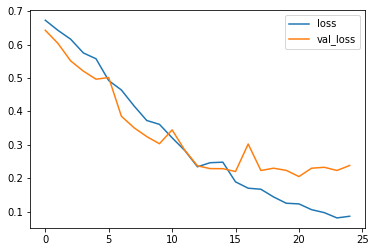

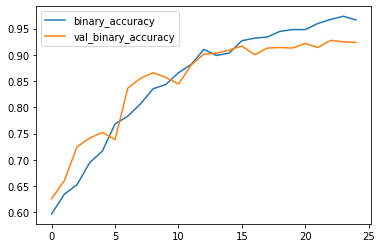

In [12]:
from IPython.core.display_functions import display
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame[['loss', 'val_loss']].plot()
history_frame[['binary_accuracy', 'val_binary_accuracy']].plot();

In [13]:
predictions=model.predict(ds_test)

In [14]:
predictions=(predictions>=0.5).astype(int)

In [15]:
predictions.astype(int).sum()

2193